<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab2/blob/main/6351071071_LAB2_Bai7(Trang27_31)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Khởi tạo và tải dữ liệu/Thư viện

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
import numpy as np
print("Nguyễn Hữu Toàn – 6351071071")

Nguyễn Hữu Toàn – 6351071071


#2. Chia dữ liệu

In [18]:
# Chuẩn bị dữ liệu
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X = data
y = digits.target

# Chia train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Nguyễn Hữu Toàn – 6351071071")

Nguyễn Hữu Toàn – 6351071071


#3. Huấn luyện mô hình (Decision Tree ID3)

In [19]:
# Tạo mô hình cây quyết định với ID3 (criterion='entropy')
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)
classifier.fit(X_train, y_train)

print("Nguyễn Hữu Toàn – 6351071071")

Nguyễn Hữu Toàn – 6351071071


#4. Dự đoán trên tập test

In [20]:
predicted = classifier.predict(X_test)

print("Nguyễn Hữu Toàn – 6351071071")

Nguyễn Hữu Toàn – 6351071071


#5. Xử lý hình ảnh chữ số viết tay

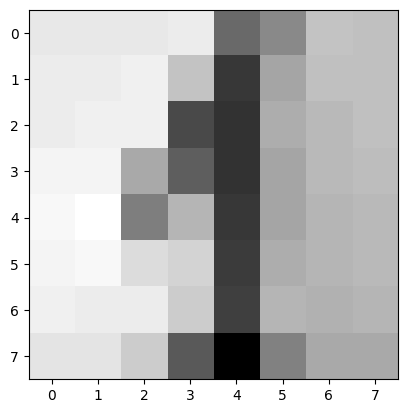

Predicted label: [1]
Nguyễn Hữu Toàn – 6351071071


In [21]:
# Mở hình, chuyển sang grayscale, resize 8x8
img = Image.open('test_image_Bai7.jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)

# Chuyển thành mảng numpy
im2arr = np.array(img)

# Hiển thị ảnh
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Chuyển mảng 2D -> 1D và chuẩn hóa
img1d = im2arr.reshape(1, -1)
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0

# Dự đoán nhãn
y_pred = classifier.predict(img1d)
print("Predicted label:", y_pred)

print("Nguyễn Hữu Toàn – 6351071071")

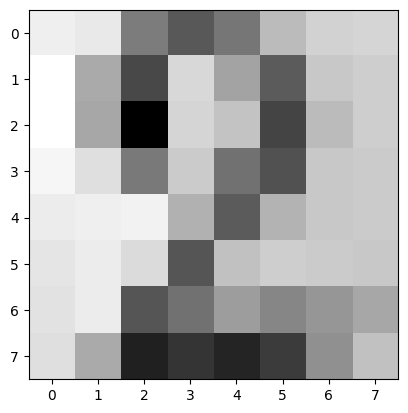

Predicted label: [2]
Nguyễn Hữu Toàn – 6351071071


In [22]:
# Mở hình, chuyển sang grayscale, resize 8x8
img = Image.open('test_image_Bai7 (1).jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)

# Chuyển thành mảng numpy
im2arr = np.array(img)

# Hiển thị ảnh
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Chuyển mảng 2D -> 1D và chuẩn hóa
img1d = im2arr.reshape(1, -1)
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0

# Dự đoán nhãn
y_pred = classifier.predict(img1d)
print("Predicted label:", y_pred)

print("Nguyễn Hữu Toàn – 6351071071")

#6. Báo cáo và biểu diễn kết quả

Nguyễn Hữu Toàn – 6351071071


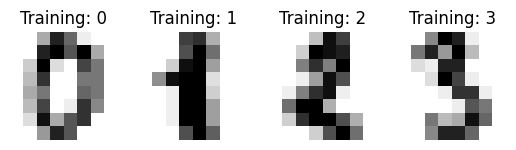

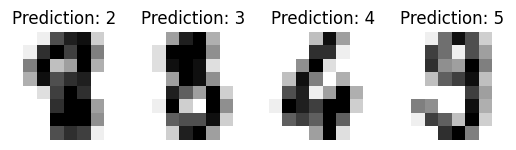

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360



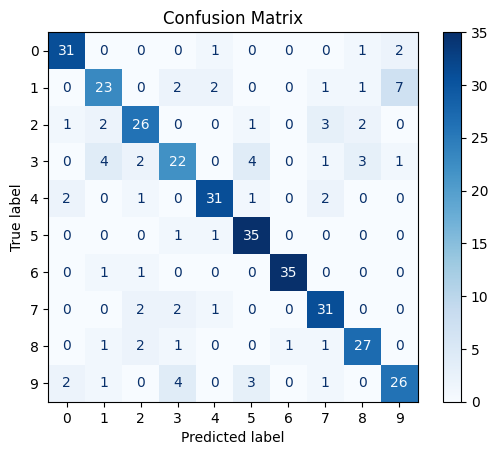

In [23]:
print("Nguyễn Hữu Toàn – 6351071071")

# Hiển thị 4 ảnh đầu tiên của tập train
_, axes = plt.subplots(1, 4)

images_and_labels = list(zip(digits.images, digits.target))  # chuyển zip thành list
for ax, (image, label) in zip(axes, images_and_labels[:4]):  # slice trên list
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()

# Hiển thị 4 dự đoán
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))  # list(zip(...))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):  # slice trên list
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# In báo cáo phân loại
print("Classification report:\n", classification_report(y_test, predicted))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                             display_labels=digits.target_names,
                                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

